In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from datetime import date


In [3]:
symbol = "VCI"
fromDate = "01/01/2023"
endDate = "10/03/2024"
securities_olhc = pd.read_excel("VCI.xlsx")
price = pd.DataFrame(securities_olhc)
price.Close = price.Close.astype(int)
price = price.drop(["Symbol", "Market", "Time", "Value"], axis=1)
price["TradingDate"] = pd.to_datetime(price["TradingDate"], format="%d/%m/%Y")
price.set_index("TradingDate", inplace=True)

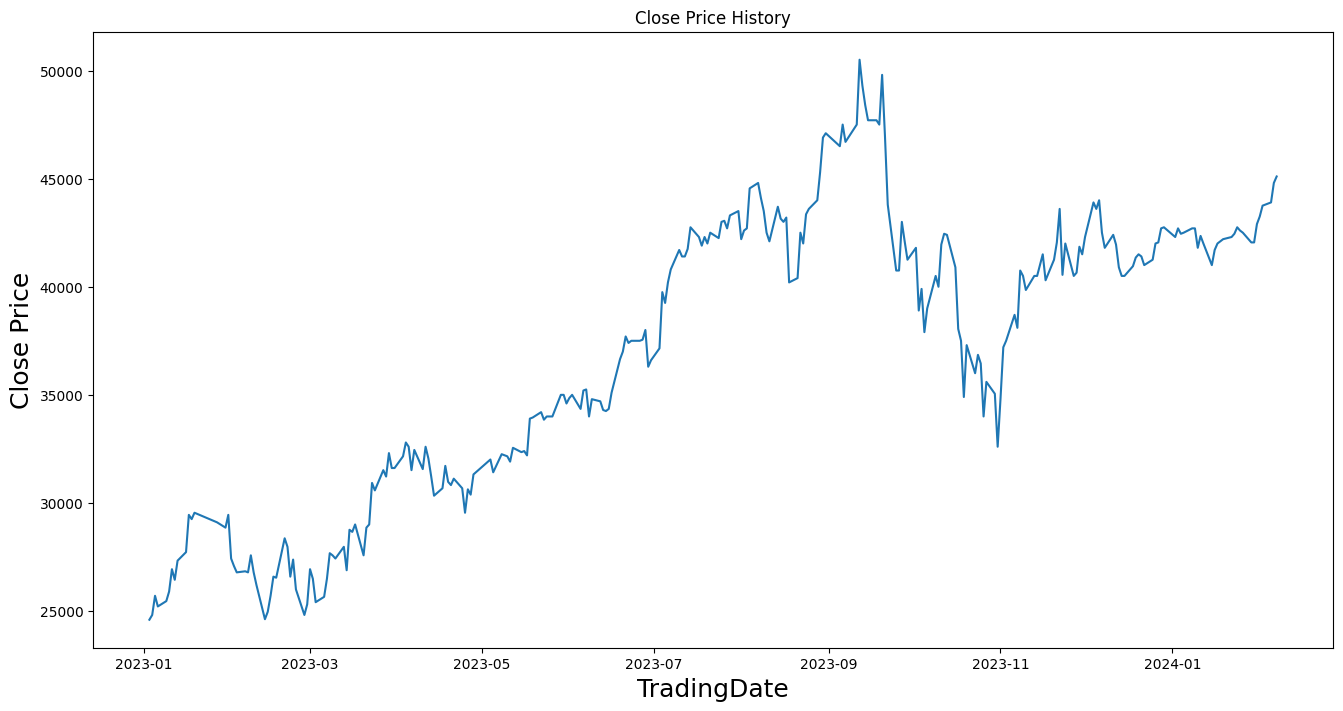

In [4]:
# plot
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(price.Close)
plt.xlabel("TradingDate", fontsize = 18)
plt.ylabel("Close Price", fontsize = 18)
plt.show()

In [5]:
#Create new df with Close
data = price.filter(["Close"])
dataset = data.values

training_data_len = math.ceil(len(dataset) * .8)
training_data_len

221

In [6]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00000000e+00],
       [8.49388055e-03],
       [4.27396626e-02],
       [2.37056484e-02],
       [3.32419598e-02],
       [5.03455465e-02],
       [9.02667851e-02],
       [7.12713795e-02],
       [1.05478553e-01],
       [1.20690321e-01],
       [1.87251457e-01],
       [1.79645574e-01],
       [1.91035095e-01],
       [1.73931508e-01],
       [1.64433806e-01],
       [1.87251457e-01],
       [1.09262191e-01],
       [9.59808502e-02],
       [8.45527200e-02],
       [8.64831474e-02],
       [8.45527200e-02],
       [1.14976256e-01],
       [8.45527200e-02],
       [6.17350681e-02],
       [9.26605150e-04],
       [1.42079456e-02],
       [4.27396626e-02],
       [7.69468360e-02],
       [7.50550172e-02],
       [1.45399792e-01],
       [1.30188024e-01],
       [7.69468360e-02],
       [1.07370372e-01],
       [5.41291842e-02],
       [8.49388055e-03],
       [2.75278947e-02],
       [9.02667851e-02],
       [7.31631983e-02],
       [3.13115324e-02],
       [4.08478437e-02],


In [7]:
# Create the training dataset
train_data = scaled_data[0:training_data_len,:]
#split the data into x_train and y_train
x_train = []
y_train = []

for i in range(50, len(train_data)):
    x_train.append(train_data[i-50 : i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.        , 0.00849388, 0.04273966, 0.02370565, 0.03324196,
       0.05034555, 0.09026679, 0.07127138, 0.10547855, 0.12069032,
       0.18725146, 0.17964557, 0.1910351 , 0.17393151, 0.16443381,
       0.18725146, 0.10926219, 0.09598085, 0.08455272, 0.08648315,
       0.08455272, 0.11497626, 0.08455272, 0.06173507, 0.00092661,
       0.01420795, 0.04273966, 0.07694684, 0.07505502, 0.14539979,
       0.13018802, 0.07694684, 0.10737037, 0.05412918, 0.00849388,
       0.02752789, 0.09026679, 0.0731632 , 0.03131153, 0.04084784,
       0.0731632 , 0.1187985 , 0.11497626, 0.10926219, 0.13018802,
       0.08837497, 0.16061156, 0.15682792, 0.17010926, 0.11497626])]
[0.16443380564456977]

[array([0.        , 0.00849388, 0.04273966, 0.02370565, 0.03324196,
       0.05034555, 0.09026679, 0.07127138, 0.10547855, 0.12069032,
       0.18725146, 0.17964557, 0.1910351 , 0.17393151, 0.16443381,
       0.18725146, 0.10926219, 0.09598085, 0.08455272, 0.08648315,
       0.08455272, 0.11497626, 0.08

In [9]:
# Convert the x_train and y_train
x_train,y_train = np.array(x_train), np.array(y_train)
# Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [10]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape =(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
#Compile the model
model.compile(optimizer="adam", loss = "mean_squared_error")

In [12]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


171/171 [==============================] - 6s 15ms/step - loss: 0.0167


In [13]:
# Create the testing dataset
# Create a new array containing scaled value from index 
test_data = scaled_data[training_data_len - 50:, :]

#Create the data set x-test and y-test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(50, len(test_data)):
    x_test.append(test_data[i-50:i, 0])

In [14]:
# Covert the data to numpy array
x_test = np.array(x_test)

In [15]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [16]:
# Get the models predicted price
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 1s 11ms/step


In [17]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1093.2075994318182

C:\Users\Windows\AppData\Local\Temp\ipykernel_10296\2764769140.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


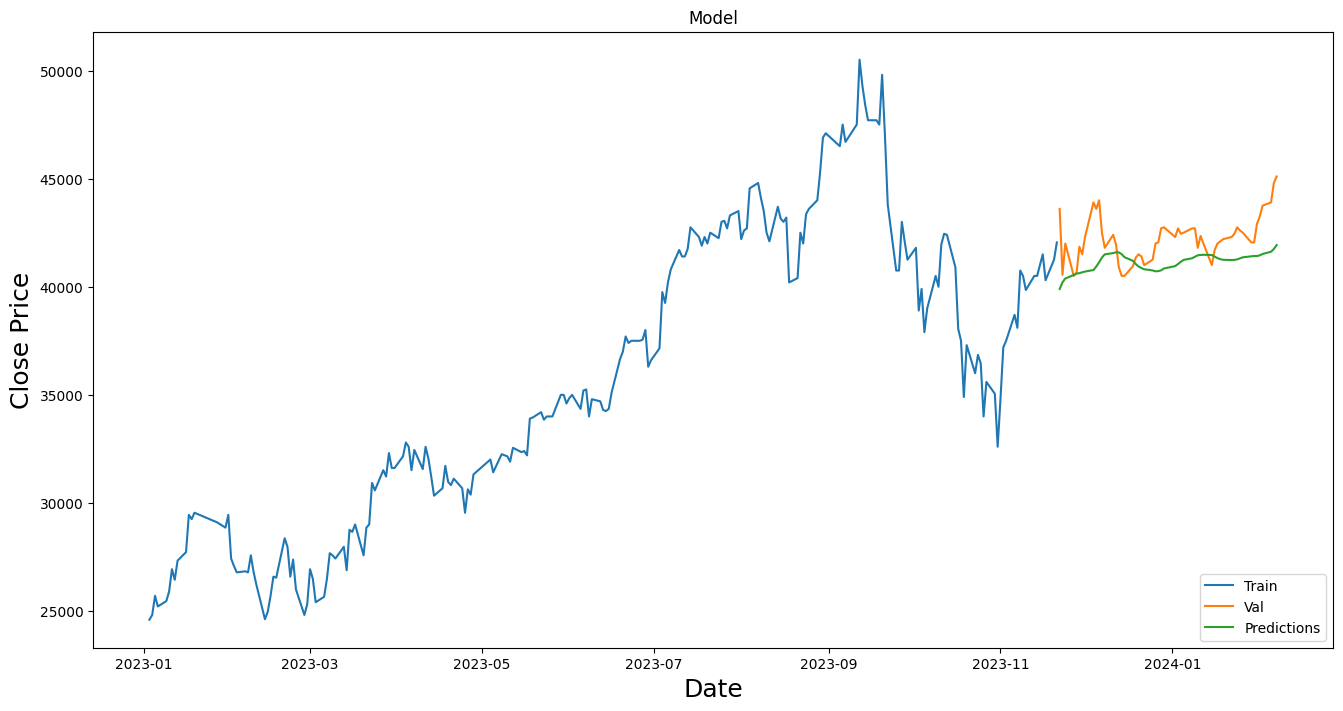

In [18]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions
#Visualize model
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Close Price", fontsize = 18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc = "lower right")
plt.show()

In [19]:
# Show the valid and predicted prices
valid 

,Close,Predictions
TradingDate,,
2023-11-22,43600,39896.210938
2023-11-23,40550,40204.332031
2023-11-24,42000,40380.562500
2023-11-27,40500,40543.820312
2023-11-28,40650,40611.105469
2023-11-29,41850,40626.187500
2023-11-30,41500,40667.835938
2023-12-01,42300,40703.039062
2023-12-04,43900,40772.718750
